# 결정트리(Decision Tree)

- 내용 정리

## Decision Tree 실습 01

Iris 데이터 결정트리 만들기

## Decision Tree 실습 02

make_moons 데이터 결정트리 만들기

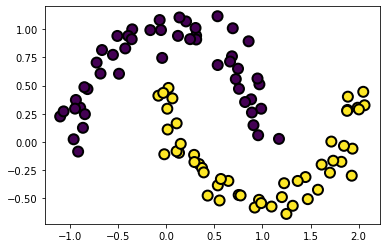

In [33]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import mglearn

X, y = make_moons(n_samples=100, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [26]:
model = DecisionTreeClassifier(max_depth=3, random_state=13)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

In [27]:
# 평가
pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(accuracy_score(y_test, pred))

0.92
0.92


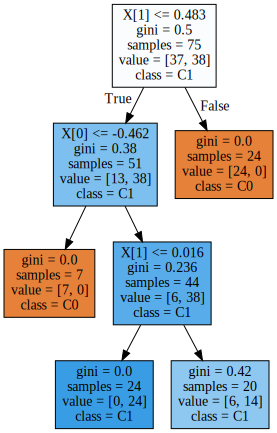

In [30]:
export_graphviz(model, out_file='tree.dot', class_names=['C0', 'C1'], impurity=True, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

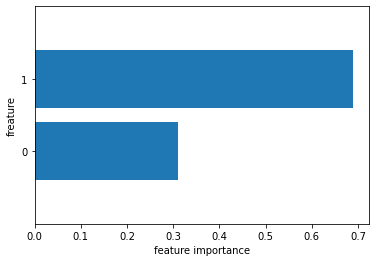

In [32]:
# 특성 중요도 시각화
def plot_feature_importances(model, X):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("feature importance")
    plt.ylabel("freature")
    plt.ylim(-1, n_features)

plot_feature_importances(model, X)

### 분류 결과 시각화

In [34]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def plot_decision_boundary(model, X, y):
    padding=0.15
    res=0.01
    
    # 데이터 세트의 x, y의 최대 값과 최소값
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    
    # x와 y의 범위
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    # 범위에 패딩 추가
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # 위의 포인트 범위로 메쉬그리드를 생성
    xx,yy = np.meshgrid( np.arange(x_min,x_max,res), np.arange(y_min,y_max,res) )
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # 모델을 사용하여 그리드 라벨의 각 지점에서 클래스를 예측하여 2D 배열을 벡터로 변환
    # c_ concatenates 예측을 수행 할 하나의 긴 벡터를 만듭니다.
    # 마지막으로 예측 벡터는 원래 데이터 형태로 재구성됩니다.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    # contourf() 를 이용하여 그리드에 class boundary를 시각화
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    
    # 원래 데이터와 레이블을 시각화
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

<Figure size 792x288 with 0 Axes>

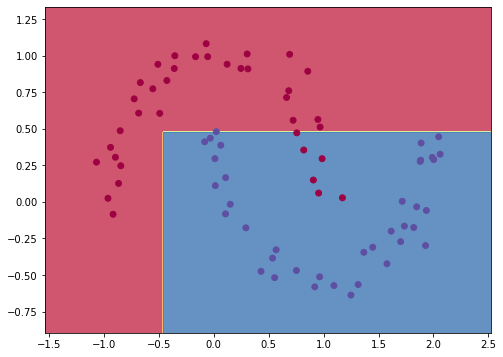

In [36]:
plt.figure(figsize=(11, 4))
plot_decision_boundary(model, X_train, y_train)
plt.show()

### 결정트리 과적합(Overfitting)

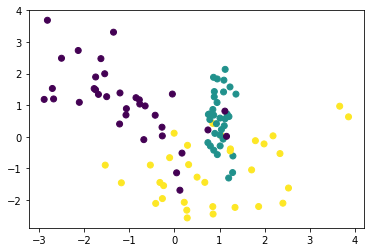

In [37]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X, y = make_classification(n_features=2, n_redundant=0,
                           n_classes=3,  n_clusters_per_class=1,
                           random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화
# 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X[:, 0], X[:, 1], c=y)

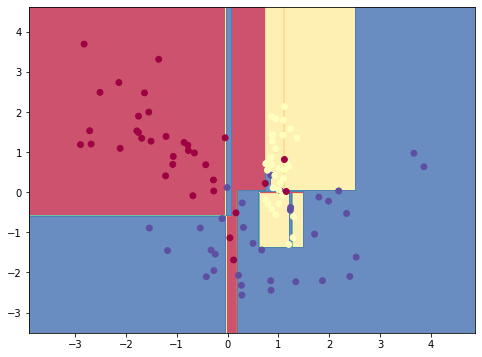

In [38]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
model = DecisionTreeClassifier().fit(X, y)

plot_decision_boundary(model, X, y)

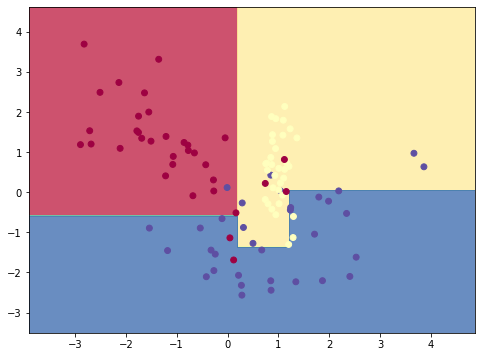

In [45]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
# 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화
model = DecisionTreeClassifier(min_samples_leaf=6).fit(X, y)

plot_decision_boundary(model, X, y)